# HR ANALYTICS 


- IMPORTS
 - Data handling & visualisation
  - Preprocessing & pipeline
  - Models
  - Validation
  - Features
  - Metrics 
- DATA MANIPULATION 1/2
  - Load 
  - Split data & Drops
  - Correlation data 
  - Employee Profile Segmenation
- DISTRIBUTION
  - Basic Visualisation 
- THEMATIC DISTRIBUTION ANALYSIS
  - Personal
  - Work
  - Rewards
  - Satisfaction
  - Correlation
- DATA MANIPULATION 2/
  - Astype
  - Select Cat & Num Columns
  - Train test split data
- PIPELINE
  - Numerical pipeline
  - Categorical pipeline
  - Column transformer
  - Cross validation 
- FINDING BEST MODEL
  - Status info
  - Models
  - Finding ( For CYKLUS  ) 
    - First test
        - Training
        - Prediction
        - Metrics
    - Secound test
        - Cross Validation
    - Thirt test
        - Grid Search
  - Print best model
  - Use best model
      - Metrics
      - Plot Metrics 
 

#### IMPORTS 

In [626]:
# Data handling & visualisation 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Preprocesing & pipeline
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
# Validation
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV
# Features 
from sklearn.feature_selection import RFE
# Metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)


#### DATA MANIPULATION 1/2

In [612]:
# Load data 
# ___________________
df= pd.read_csv('../../datasets/hr_employee_attrition/HR-Employee-Attrition.csv')

# Split Data $ Drops
# ___________________
X = df.drop(columns=['Attrition','StandardHours', 'Over18','EmployeeCount', 'EmployeeNumber'])
y = df['Attrition'].map({'Yes':1, 'No':0})

# Correlation Data
# ___________________
correlation = X.assign(Attrition=df['Attrition'])
correlation['Attrition'] = correlation['Attrition'].map({'Yes':1, 'No': 0})


# Employee Profile Segmentation 
# ___________________
personal= df[['Attrition','Age','DistanceFromHome', 'Education', 'EducationField', 'Gender', 'MaritalStatus', 'NumCompaniesWorked','TotalWorkingYears']]

work= df[['Attrition','Department', 'JobLevel', 'JobRole', 'OverTime','TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]

reward = df[['Attrition','BusinessTravel','DailyRate', 'MonthlyIncome', 'MonthlyRate', 'PercentSalaryHike', 'StockOptionLevel']]

satisfaction =df[['Attrition','EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 'RelationshipSatisfaction', 'WorkLifeBalance','PerformanceRating']]
         

#### DISTRIBUTION 

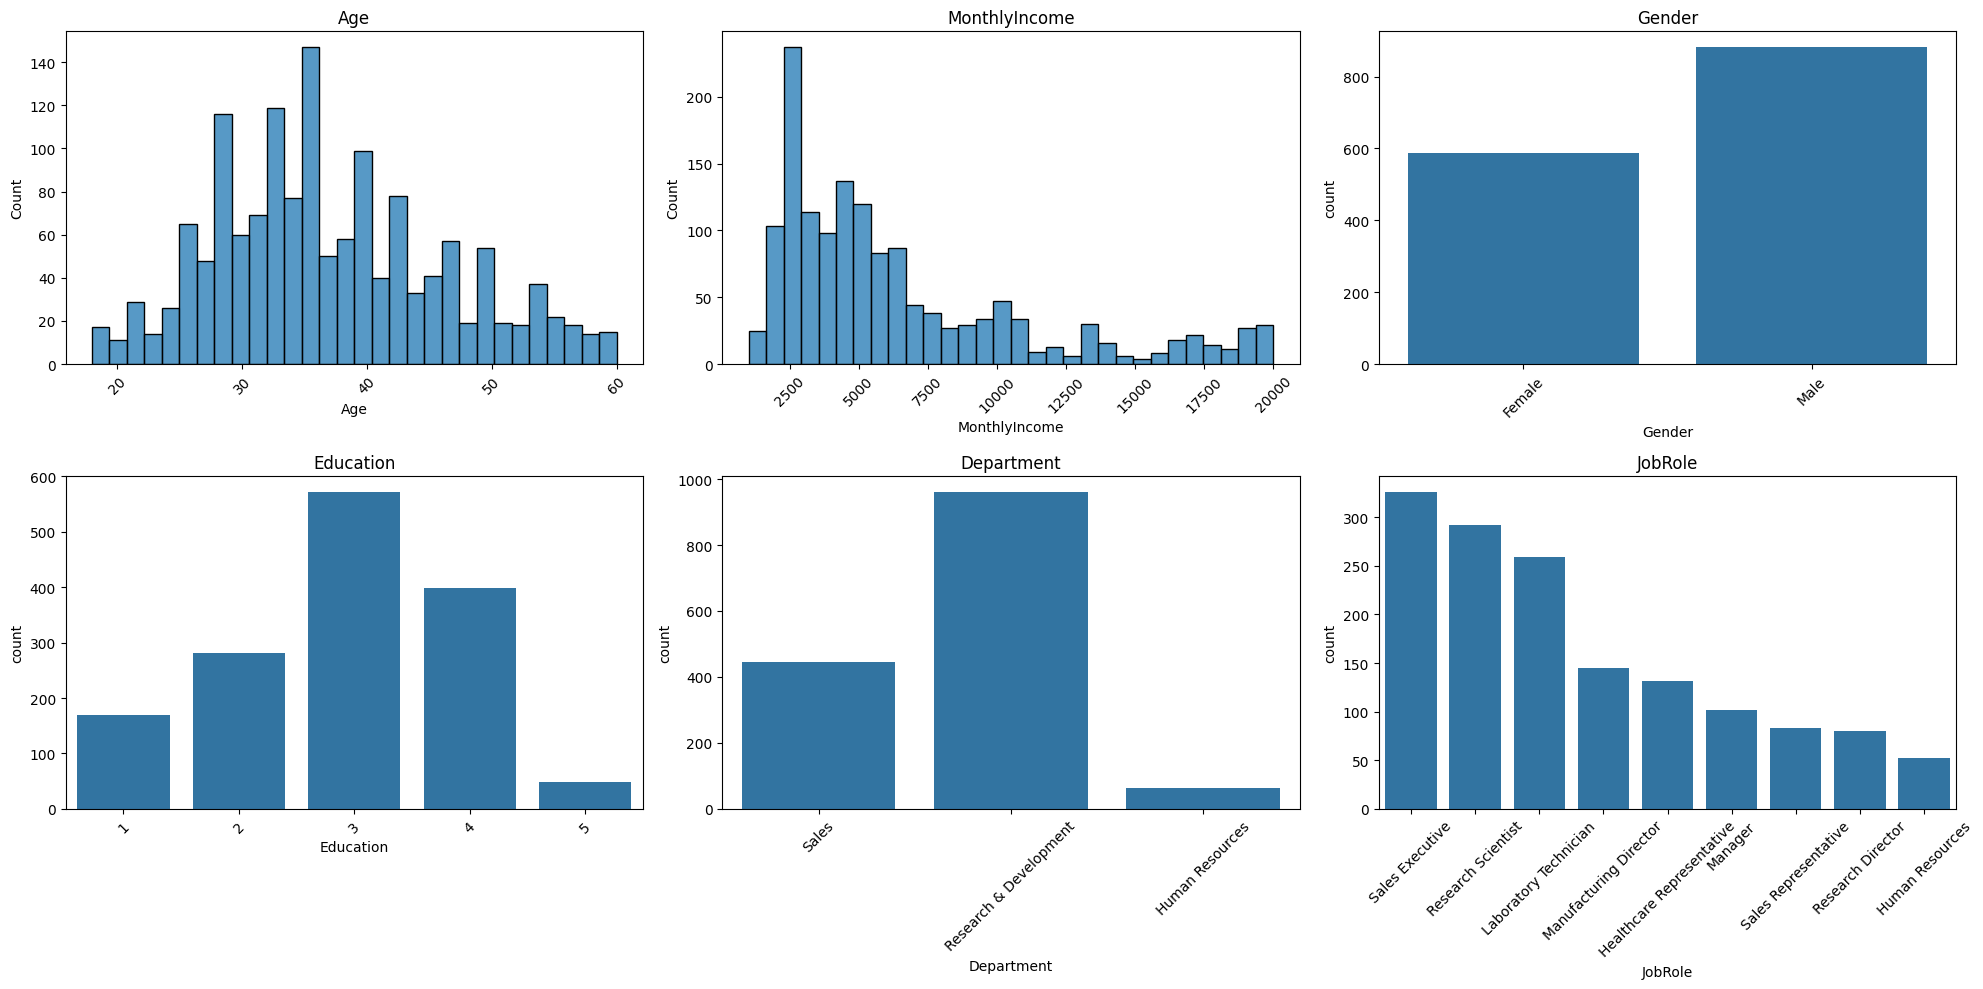

In [613]:
# Basic Visualisation 
fig, ax = plt.subplots(2,3,figsize=(20,10))
sns.histplot(x='Age', data=personal, bins=30, ax=ax[0,0])
sns.histplot(x='MonthlyIncome', data=reward, bins=30, ax=ax[0,1])
sns.countplot(x='Gender', data=personal, ax=ax[0,2])
sns.countplot(x='Education', data=personal, ax=ax[1,0])
sns.countplot(x='Department', data=work, ax=ax[1,1])
sns.countplot(x='JobRole', data=work, ax=ax[1,2])

title=['Age', 'MonthlyIncome', 'Gender', 'Education', 'Department', 'JobRole'] 

for i,ax in enumerate(ax.flat): 
    ax.tick_params(axis='x', labelrotation=45)
    ax.set_title(title[i])
plt.tight_layout()
plt.show()

#### THEMATIC DISTRIBUTION ANALYSIS 

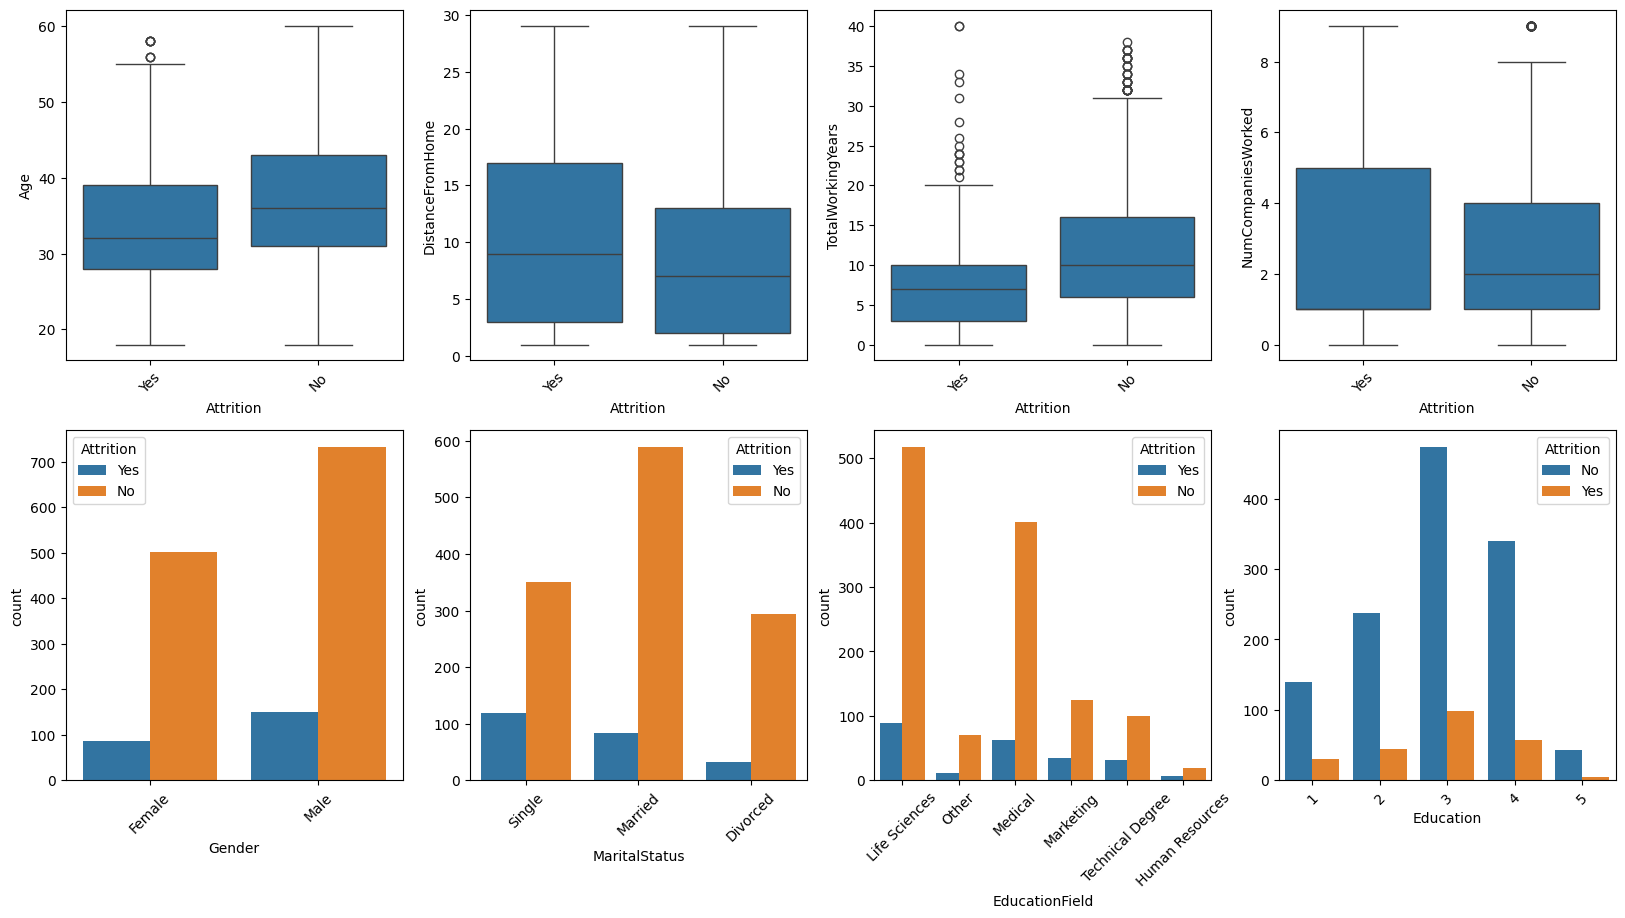

In [614]:
# PERSONAL
 # ___________________
fig, axes = plt.subplots(2,4, figsize=(20,10))

sns.boxplot(x='Attrition', y='Age', data=personal, ax= axes[0,0])
sns.boxplot(x='Attrition', y='DistanceFromHome', data=personal, ax= axes[0,1])
sns.boxplot(x='Attrition', y='TotalWorkingYears', data=personal, ax= axes[0,2])
sns.boxplot(x='Attrition', y='NumCompaniesWorked', data=personal, ax= axes[0,3])

sns.countplot(x='Gender', hue='Attrition', data=df, ax= axes[1,0])
sns.countplot(x='MaritalStatus', hue='Attrition', data=df, ax= axes[1,1])
sns.countplot(x='EducationField', hue='Attrition', data=df, ax= axes[1,2])
sns.countplot(x='Education', hue='Attrition', data=df, ax= axes[1,3])

for ax in axes.flat:
    ax.tick_params(axis='x', labelrotation=45)

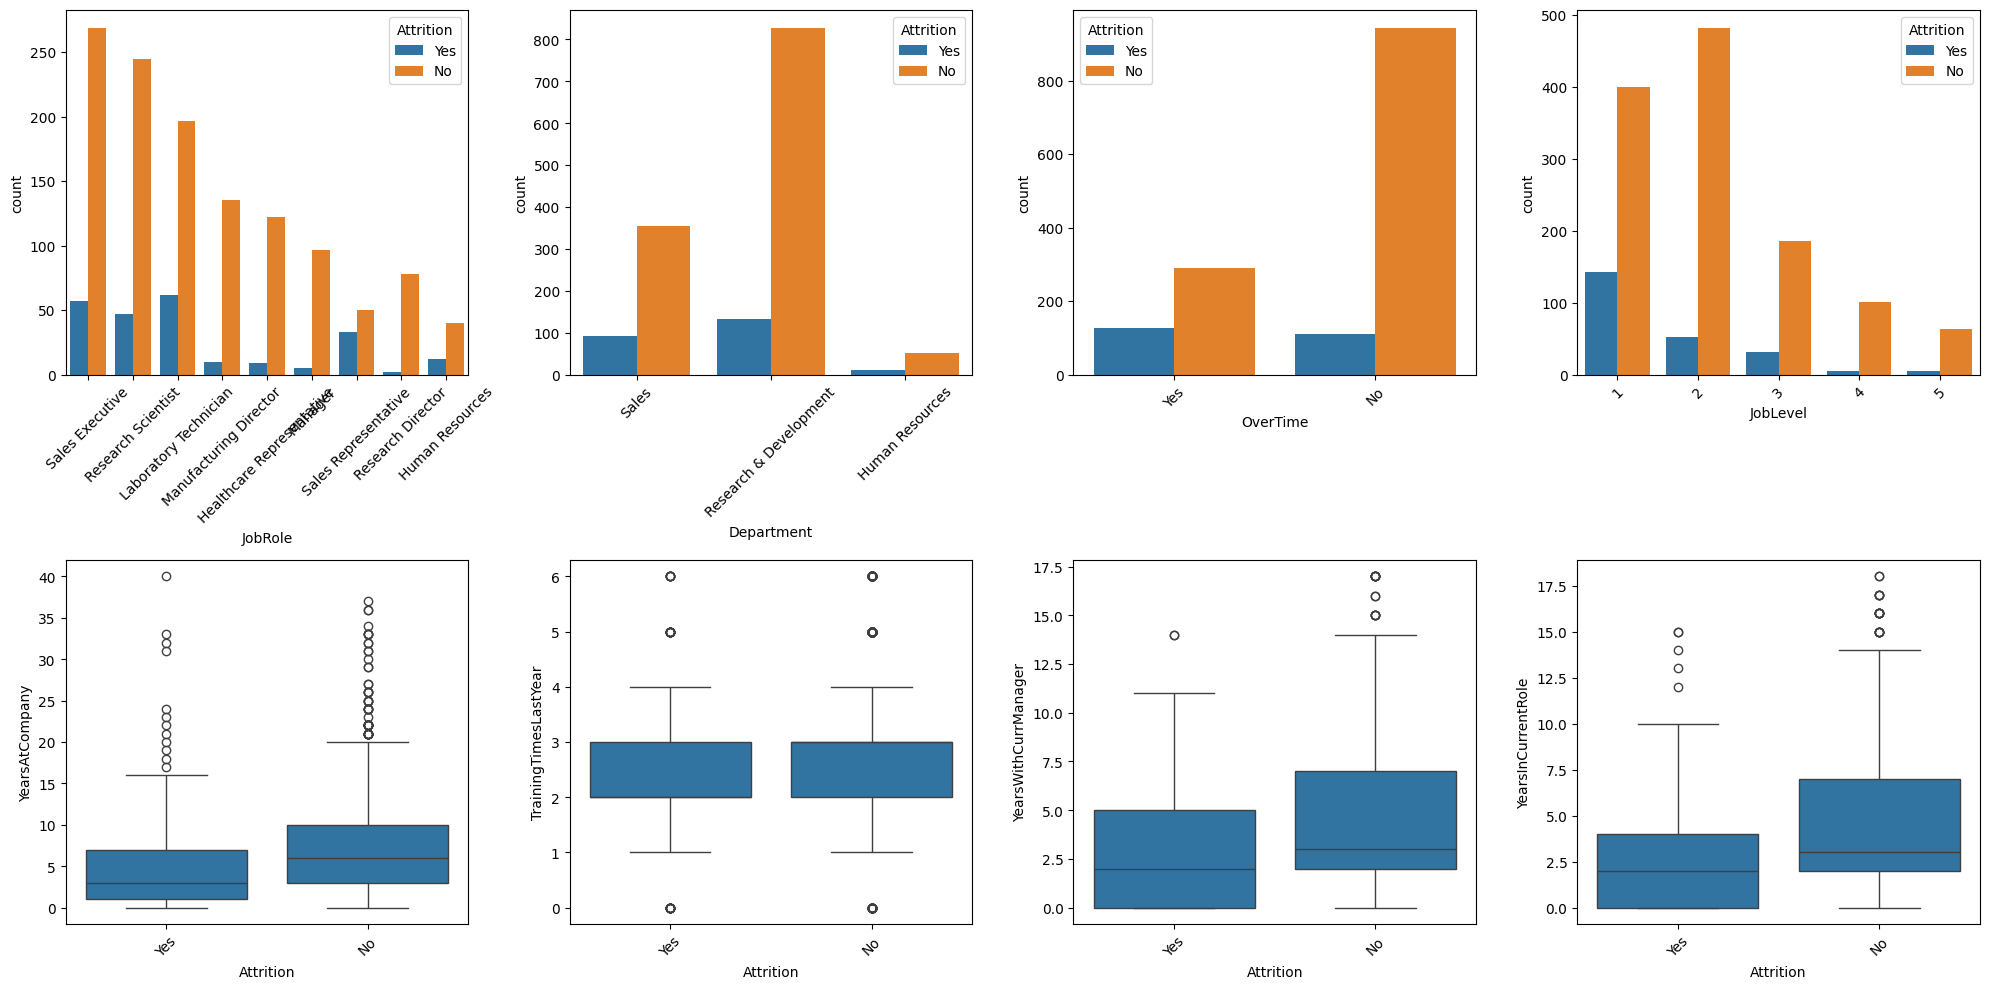

In [615]:
# WORK
 # ___________________
fig, axes = plt.subplots(2,4, figsize=(20,10))
sns.countplot(x='JobRole', hue='Attrition', data=work, ax= axes[0,0])
sns.countplot(x='Department', hue='Attrition', data=work, ax= axes[0,1])
sns.countplot(x='OverTime', hue='Attrition', data=work, ax= axes[0,2])
sns.countplot(x='JobLevel', hue='Attrition', data=work, ax= axes[0,3])

sns.boxplot(y='YearsAtCompany', x='Attrition', data=work, ax= axes[1,0])
sns.boxplot(y='TrainingTimesLastYear', x='Attrition', data=work, ax= axes[1,1])
sns.boxplot(y='YearsWithCurrManager', x='Attrition', data=work, ax= axes[1,2])
sns.boxplot(y='YearsInCurrentRole', x='Attrition', data=work, ax= axes[1,3])

for ax in axes.flat: 
    ax.tick_params(axis='x',labelrotation=45)
plt.tight_layout()
plt.show()


<Axes: xlabel='Attrition', ylabel='DailyRate'>

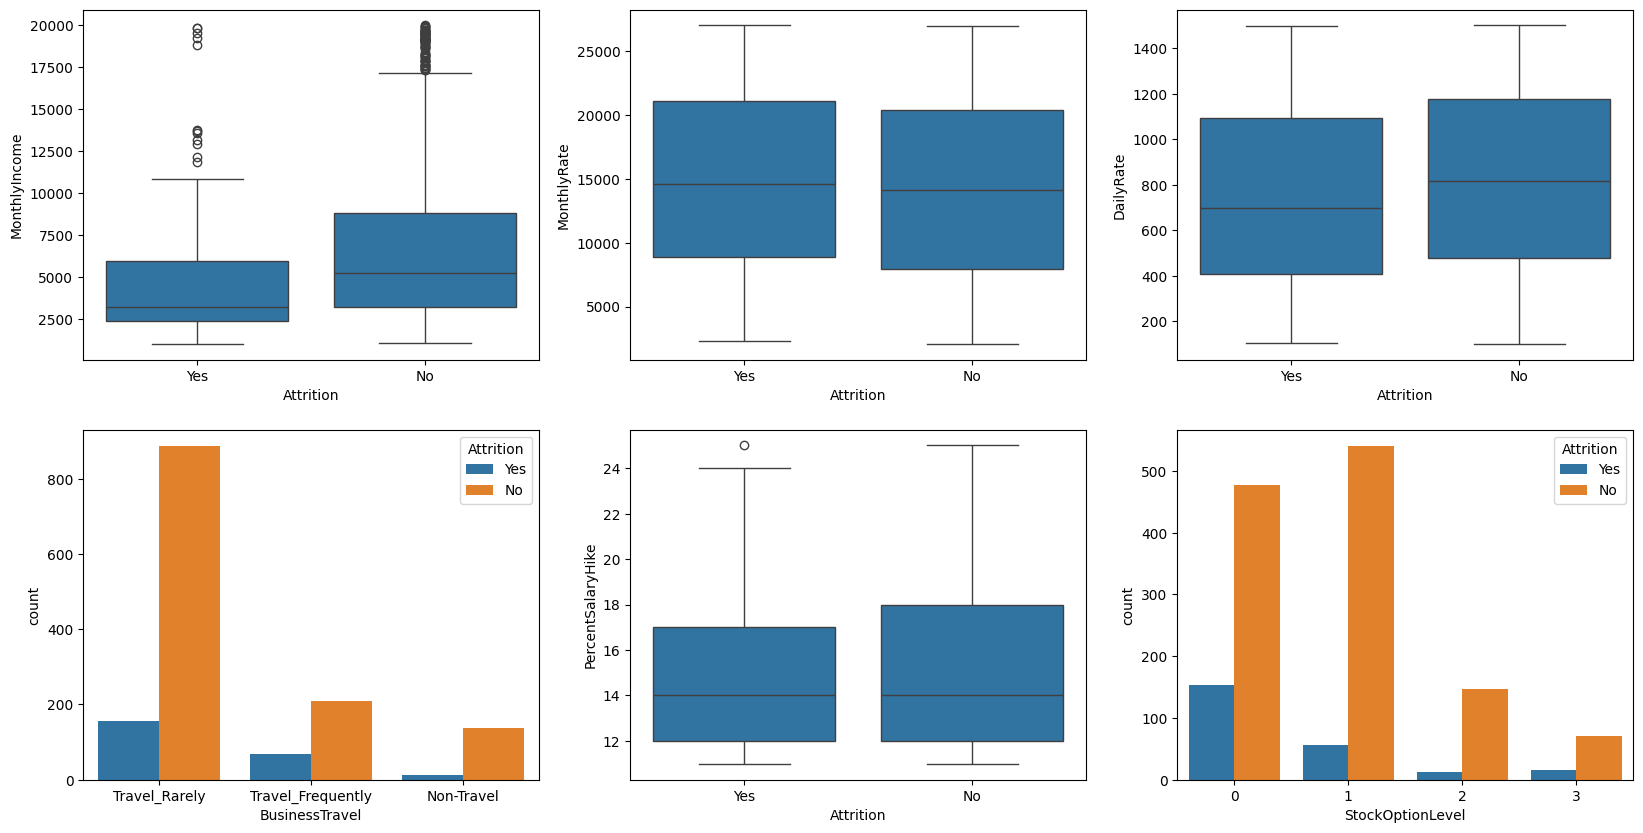

In [616]:
# REWARDS
 # ___________________
fig, axes = plt.subplots(2,3, figsize=(20,10))
sns.countplot(x='BusinessTravel', hue='Attrition', data=reward, ax= axes[1,0])
sns.boxplot(y='PercentSalaryHike', x='Attrition', data=reward, ax= axes[1,1])
sns.countplot(x='StockOptionLevel', hue='Attrition', data=reward, ax= axes[1,2])

sns.boxplot(x='Attrition', y='MonthlyIncome', data=reward, ax= axes[0,0])
sns.boxplot(x='Attrition', y='MonthlyRate', data=reward, ax= axes[0,1])
sns.boxplot(x='Attrition', y='DailyRate', data=reward, ax= axes[0,2])

<Axes: xlabel='RelationshipSatisfaction', ylabel='count'>

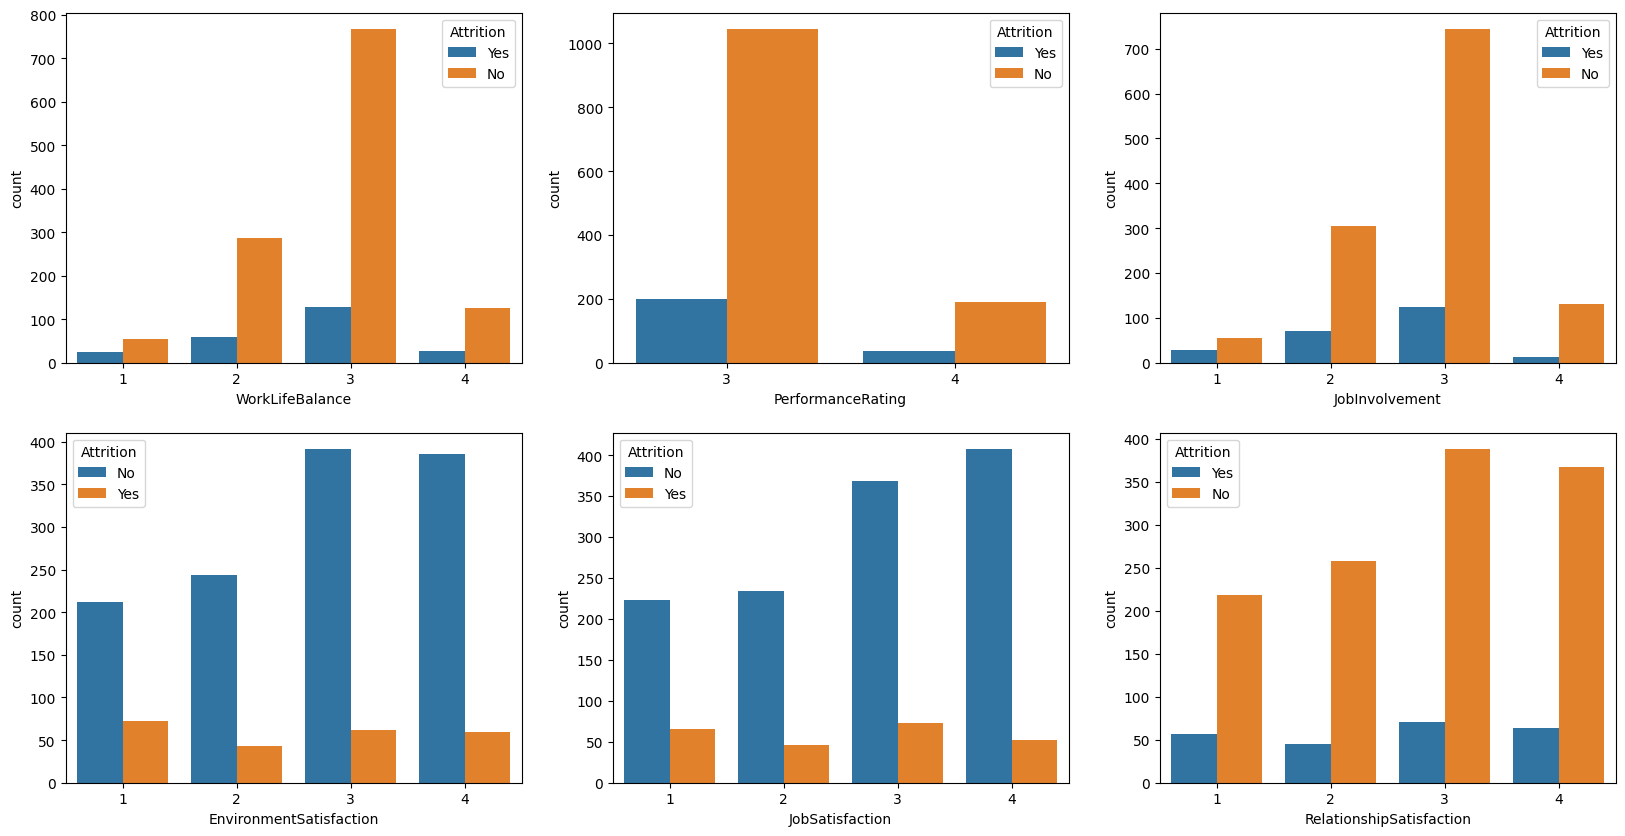

In [617]:
# SATISFACTION
# ___________________
fig, axes = plt.subplots(2,3, figsize=(20,10))
sns.countplot(x='WorkLifeBalance', hue='Attrition', data=satisfaction, ax= axes[0,0])
sns.countplot(x='PerformanceRating', hue='Attrition', data=satisfaction, ax=axes[0,1])
sns.countplot(x='JobInvolvement', hue='Attrition', data=satisfaction, ax=axes[0,2])

sns.countplot(x='EnvironmentSatisfaction', hue='Attrition', data=satisfaction, ax=axes[1,0])
sns.countplot(x='JobSatisfaction', hue='Attrition', data=satisfaction, ax=axes[1,1])
sns.countplot(x='RelationshipSatisfaction', hue='Attrition', data=satisfaction, ax=axes[1,2])


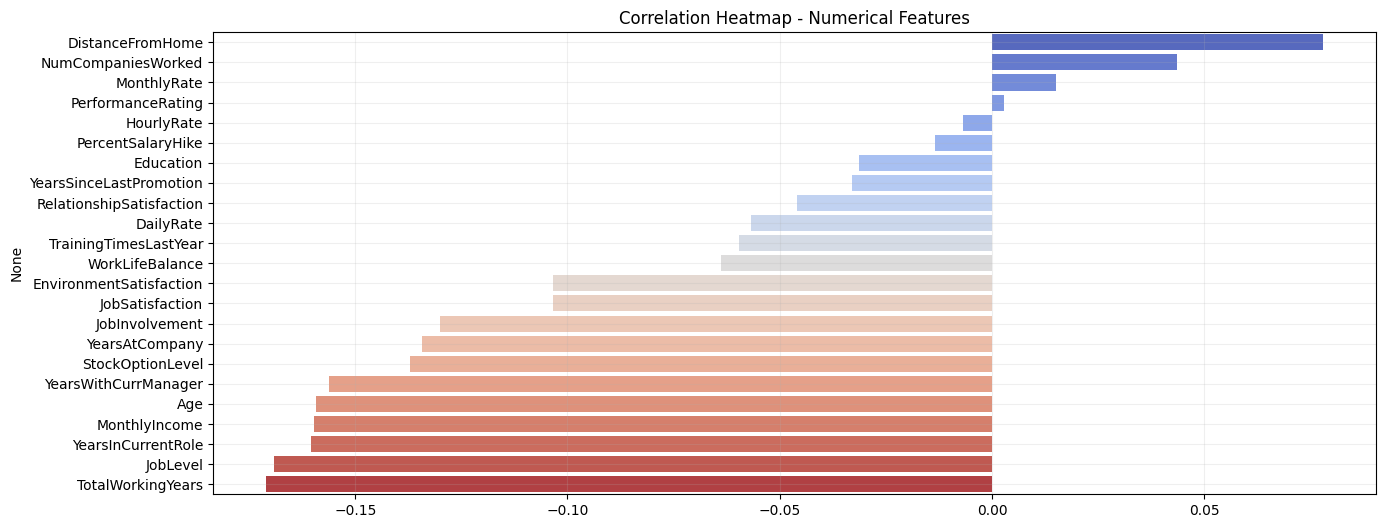

In [618]:
# Correlation
# ___________________

corr = correlation.corr(numeric_only=True)['Attrition'].drop('Attrition').sort_values(ascending=False)
plt.figure(figsize=(15,6))
sns.barplot(x=corr.values, y=corr.index,hue=corr.index, palette='coolwarm')
plt.title('Correlation Heatmap - Numerical Features')
plt.grid(linestyle='-', alpha=0.2)
plt.show()

#### DATA MANIPULATION 2/2

In [619]:
# Astype 
# ___________________
X.OverTime = X.OverTime.astype('category')
X.PerformanceRating = X.PerformanceRating.astype('category')

In [620]:
# select CAT & NUM columns 
# ___________________
cat_cols = X.select_dtypes(include=['object', 'category']).columns
num_cols = X.select_dtypes(include=['number']).columns

# Train test split
# ___________________
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

#### PIPELINE 

In [621]:
# Numerical Pipeline 
# ___________________
numerical = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Categorical Pipeline
# ___________________
categorical = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore')),
])
# Column Transformer
# ___________________
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical, num_cols),
    ('cat', categorical, cat_cols)
])

# Cross validation 
# ___________________
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) 

#### FINDING BEST MODEL 

First Test with LogisticRegression(random_state=42)

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       255
           1       0.62      0.46      0.53        39

    accuracy                           0.89       294
   macro avg       0.77      0.71      0.73       294
weighted avg       0.88      0.89      0.88       294

Secound Test with LogisticRegression(random_state=42)

[0.45333333 0.5974026  0.50704225 0.54054054 0.48717949]
Thirt test with LogisticRegression(random_state=42)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
{'model__C': 0.1, 'model__class_weight': 'balanced', 'model__max_iter': 500, 'model__penalty': 'l2', 'model__solver': 'lbfgs'}
0.49289859113958423
Four test with LogisticRegression(random_state=42)

{'rfe__n_features_to_select': 15}
0.44748013481147686
First Test with KNeighborsClassifier()

              precision    recall  f1-score   support

           0       0.88      0.99      0.93  

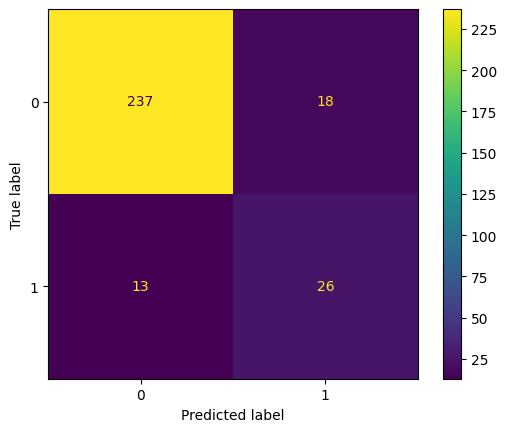

In [647]:
# Status info 
# ___________________
best_model = None
best_score = 0
best_name = None
best_param = None 

# Models
models= [
    ('LogisticRegression', LogisticRegression(random_state=42)),
    ('KNN'              , KNeighborsClassifier()),
    ('RandomForest'     , RandomForestClassifier())
]

for name, model in models:
    
    # First Test
    # ___________________
    print('====================================')
    print(f'First Test with {model}\n')
    
    # basic 
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model )
    ])
    # Training 
    training = pipeline.fit(X_train, y_train)
    
    # Prediction
    y_pred = training.predict(X_test)
    
    # Metrics
    print(classification_report(y_test,y_pred))
    
    # Second Test 
    # ___________________
    print('====================================')
    print(f'Secound Test with {model}\n')
    
    # Cross validation 
    scores=cross_val_score(pipeline, X,y, cv=cv, scoring='f1')
    print(scores)
    
    
    # Thrit Test 
    # ___________________
    print('====================================')
    print(f'Thirt test with {model}\n')
    
    if name == 'LogisticRegression':
    
        # Grid Search 
        param_dict= {
            'model__C': [0.001, 0.01, 0.1, 1,10 ],
            'model__penalty': ['l2'],
            'model__solver': ['lbfgs', 'liblinear'],
            'model__max_iter': [500, 1000, 2000],
            'model__class_weight': ['balanced'] 
        }
        grid = GridSearchCV(pipeline, param_dict, cv=cv, scoring='f1', n_jobs=-1, verbose=1 ) 
        grid.fit(X,y)
            
        # Metrics
        print(grid.best_params_)
        print(grid.best_score_)
        if grid.best_score_> best_score: 
            best_score = grid.best_score_
            best_model = grid.best_estimator_
            best_name = name
            best_params = grid.best_params_
        
        
        # Four Test 
        # ___________________
        print('====================================')
        print(f'Four test with {model}\n')
            
        # Grid search + RFE 
        pipe_rfe = Pipeline(steps=[
             ('preprocessor', grid.best_estimator_.named_steps['preprocessor']),
             ('rfe', RFE(estimator=grid.best_estimator_.named_steps['model'])),
              ('model', grid.best_estimator_.named_steps['model'])
        ])
            
        param_grid= {
               'rfe__n_features_to_select': [8,10,12,15]
        }
        grid_rfe = GridSearchCV(pipe_rfe, param_grid, cv=cv, scoring='f1', n_jobs=-1)
        grid_rfe.fit(X,y) 
        # Metrics
        print(grid_rfe.best_params_)
        print(grid_rfe.best_score_)
        
    elif name == 'KNN':
        param_dict= {
            'model__n_neighbors': [ 3,5,7,9,11,15],
            'model__weights'    : ['uniform', 'distance'],
            'model__p'          : [1,2,3]
        }
 
        grid = GridSearchCV(pipeline, param_dict, cv=cv, scoring='f1', n_jobs=-1, verbose=1 ) 
        grid.fit(X,y)
            
        # Metrics
        print(grid.best_params_)
        print(grid.best_score_)
        if grid.best_score_> best_score: 
            best_score = grid.best_score_
            best_model = grid.best_estimator_
            best_name = name
            best_params = grid.best_params_
        
    elif name == 'RandomForest':
        param_dict= {
            'model__n_estimators'      : [100,200,300,500],
            'model__max_depth'        : [None, 5, 10, 20, 30],
            'model__min_samples_split': [2,5,10],
            'model__min_samples_leaf' : [1,2,4],
            'model__max_features'     : ['sqrt', 'log2'],
            'model__class_weight'     : ['balanced'] 
        }
           
 
        grid = GridSearchCV(pipeline, param_dict, cv=cv, scoring='f1', n_jobs=-1, verbose=1 ) 
        grid.fit(X,y)
            
        # Metrics
        print(grid.best_params_)
        print(grid.best_score_)
        if grid.best_score_> best_score: 
            best_score = grid.best_score_
            best_model = grid.best_estimator_
            best_name = name
            best_params = grid.best_params_

            
# Print Best Model 
# ___________________
print(f"\n✅ Best model: {best_name}")
print(f"F1_score: {best_score:.3f}")
print(f"Params: {best_params}")

# Use Best Model for prediction 
y_pred = best_model.predict(X_test)

# Metrics
print('F1_score:', f1_score(y_test, y_pred))
print('Acc_score:', accuracy_score(y_test, y_pred))
print('Recall_score:', recall_score(y_test, y_pred))
print('Precision_score:', precision_score(y_test, y_pred))
print('Report:', classification_report(y_test, y_pred))

# Plot Metrics
cm=confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(cm).plot()